# Count Vectorizer

In [1]:
import pandas as pd

In [5]:
series = pd.read_pickle("textClean.pkl")
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

Clean, normalized text is turned into a **Document-Term Matrix (DTM)** for vectorization.<br>
* Each row represents a document, and each column represents a term.
* The values within the DTM can be word counts, TF-IDF scores, or other calculated values.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(stop_words="english", ngram_range=(1, 2), min_df=.2, max_df=.8)

In [19]:
dtm = cv.fit_transform(series)
dtmDf = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtmDf

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


## EDA - Most Common Word

In [21]:
termFreq = dtmDf.sum()
termFreq

ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

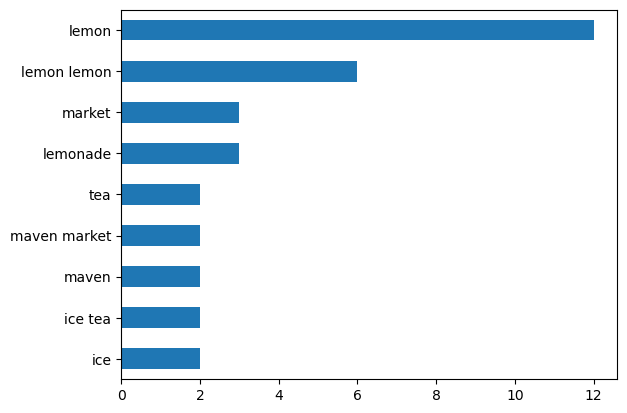

In [26]:
termFreq.sort_values().plot(kind="barh");